In [1]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-225-1 model fitting.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Aldehyde,Unnamed: 4,Imine ester,Intermediate 1,Intermediate 2,Unnamed: 8,Ester fuel,...,Unnamed: 11,Unnamed: 12,Phenol waste,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Fuel dimer,Alanine waste,Unnamed: 20
0,-360,0.000000,4456.17,6.000000,0.00000,0.000000,0,0,1.0,48.000000,...,0.000000,0.00,0.000000,1.0,0.000,0.0000,0.00,0.000000,0.000000,NaN
1,0,6.000000,3920.48,5.949246,33.44610,0.050754,0,0,64658.8,45.652071,...,0.501531,2546.88,1.799144,96137.6,453.930,142.4300,4873.37,0.067191,2.298991,NaN
2,294,10.900000,1673.73,5.841062,45.54290,0.158938,0,0,28058.3,44.763159,...,0.495633,1624.36,2.595656,43855.2,238.276,125.6580,3426.98,0.126258,3.443352,NaN
3,545,15.083333,1689.95,5.936119,18.18610,0.063881,0,0,27545.7,44.127214,...,0.503855,2065.24,3.310625,43068.2,158.769,71.0989,4093.67,0.071904,4.140000,NaN
4,796,19.266667,1674.92,6.003733,-1.04139,-0.003733,0,0,27040.6,43.629645,...,0.389509,2469.41,3.984206,42489.6,196.729,123.7760,5023.64,0.123886,5.028090,NaN


In [3]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()


,Unnamed: 0,Time,Unnamed: 2,Aldehyde,Unnamed: 4,Imine ester,Intermediate 1,Intermediate 2,Unnamed: 8,Fuel,...,Unnamed: 11,Unnamed: 12,Waste,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Fuel dimer,Alanine waste,Unnamed: 20
0,-360,0.000000,4456.17,6.000000,0.00000,0.000000,0,0,1.0,48.000000,...,0.000000,0.00,0.000000,1.0,0.000,0.0000,0.00,0.000000,0.000000,NaN
1,0,6.000000,3920.48,5.949246,33.44610,0.050754,0,0,64658.8,45.652071,...,0.501531,2546.88,1.799144,96137.6,453.930,142.4300,4873.37,0.067191,2.298991,NaN
2,294,10.900000,1673.73,5.841062,45.54290,0.158938,0,0,28058.3,44.763159,...,0.495633,1624.36,2.595656,43855.2,238.276,125.6580,3426.98,0.126258,3.443352,NaN
3,545,15.083333,1689.95,5.936119,18.18610,0.063881,0,0,27545.7,44.127214,...,0.503855,2065.24,3.310625,43068.2,158.769,71.0989,4093.67,0.071904,4.140000,NaN
4,796,19.266667,1674.92,6.003733,-1.04139,-0.003733,0,0,27040.6,43.629645,...,0.389509,2469.41,3.984206,42489.6,196.729,123.7760,5023.64,0.123886,5.028090,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        4.387818e-03 1.101586e-04
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   7
Objective              <symfit.core.objectives.LeastSquares object at 0x7f9804147eb0>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7f9804147f40>

Goodness of fit qualifiers:
chi_squared            4.041083451555724
objective_value        2.020541725777862
r_squared              0.9637315824722816


<IPython.core.display.Javascript object>


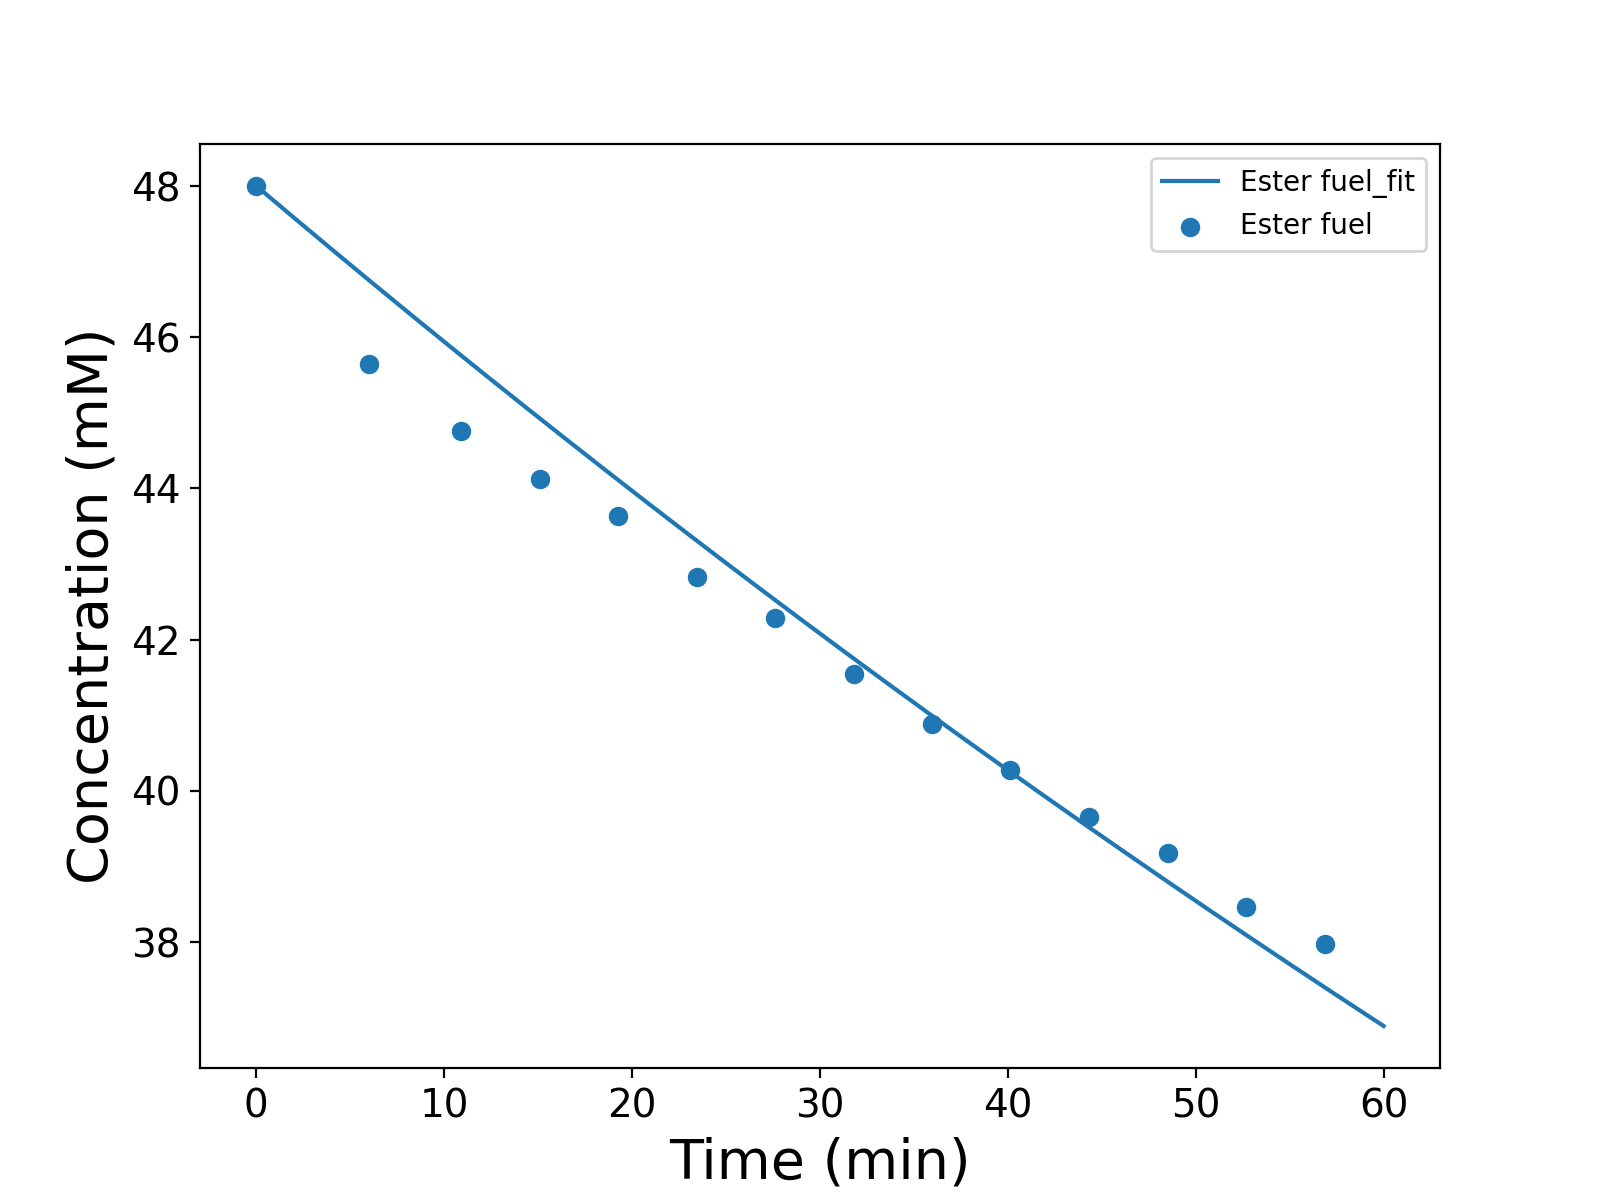

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-225-1 (pH 6.10) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [1]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-219-2 model fitting.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Aldehyde,Unnamed: 4,Imine ester,Intermediate 1,Intermediate 2,Unnamed: 8,Ester fuel,...,Unnamed: 11,Unnamed: 12,Phenol waste,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Fuel dimer,Alanine waste
0,-360,0.000000,3692.28,6.000000,0.0000,0.000000,0,0,1.0,48.000000,...,0.000000,0.00,0.000000,1.0,0.000,0.000,0.000,0.00,0.000000,0.000000
1,0,6.000000,3174.99,5.484027,298.7240,0.515973,0,0,54736.6,42.980515,...,0.730489,4834.87,3.817291,84201.5,1149.700,531.518,797.085,7804.89,0.270021,3.965031
2,280,10.666667,1348.14,5.496630,123.4600,0.503370,0,0,22252.2,40.842463,...,0.944441,3119.38,5.757362,36003.9,546.197,471.279,560.055,5618.77,0.523641,6.243049
3,531,14.850000,1363.91,5.598423,97.8339,0.401577,0,0,21108.6,38.896654,...,1.129549,4111.53,7.611563,34259.3,467.696,577.954,675.183,7254.20,0.641661,8.053821
4,782,19.033333,1375.70,5.626388,91.3514,0.373612,0,0,20090.1,37.110549,...,1.265021,5003.87,9.285399,32493.1,386.847,628.454,720.433,8656.34,0.703408,9.688764


In [2]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Aldehyde,Unnamed: 4,Imine ester,Intermediate 1,Intermediate 2,Unnamed: 8,Fuel,...,Unnamed: 11,Unnamed: 12,Waste,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Fuel dimer,Alanine waste
0,-360,0.000000,3692.28,6.000000,0.0000,0.000000,0,0,1.0,48.000000,...,0.000000,0.00,0.000000,1.0,0.000,0.000,0.000,0.00,0.000000,0.000000
1,0,6.000000,3174.99,5.484027,298.7240,0.515973,0,0,54736.6,42.980515,...,0.730489,4834.87,3.817291,84201.5,1149.700,531.518,797.085,7804.89,0.270021,3.965031
2,280,10.666667,1348.14,5.496630,123.4600,0.503370,0,0,22252.2,40.842463,...,0.944441,3119.38,5.757362,36003.9,546.197,471.279,560.055,5618.77,0.523641,6.243049
3,531,14.850000,1363.91,5.598423,97.8339,0.401577,0,0,21108.6,38.896654,...,1.129549,4111.53,7.611563,34259.3,467.696,577.954,675.183,7254.20,0.641661,8.053821
4,782,19.033333,1375.70,5.626388,91.3514,0.373612,0,0,20090.1,37.110549,...,1.265021,5003.87,9.285399,32493.1,386.847,628.454,720.433,8656.34,0.703408,9.688764


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        1.192312e-02 2.644835e-04
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   9
Objective              <symfit.core.objectives.LeastSquares object at 0x7fa084297c40>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fa084297eb0>

Goodness of fit qualifiers:
chi_squared            12.29655047431549
objective_value        6.148275237157745
r_squared              0.9786397901042586


<IPython.core.display.Javascript object>


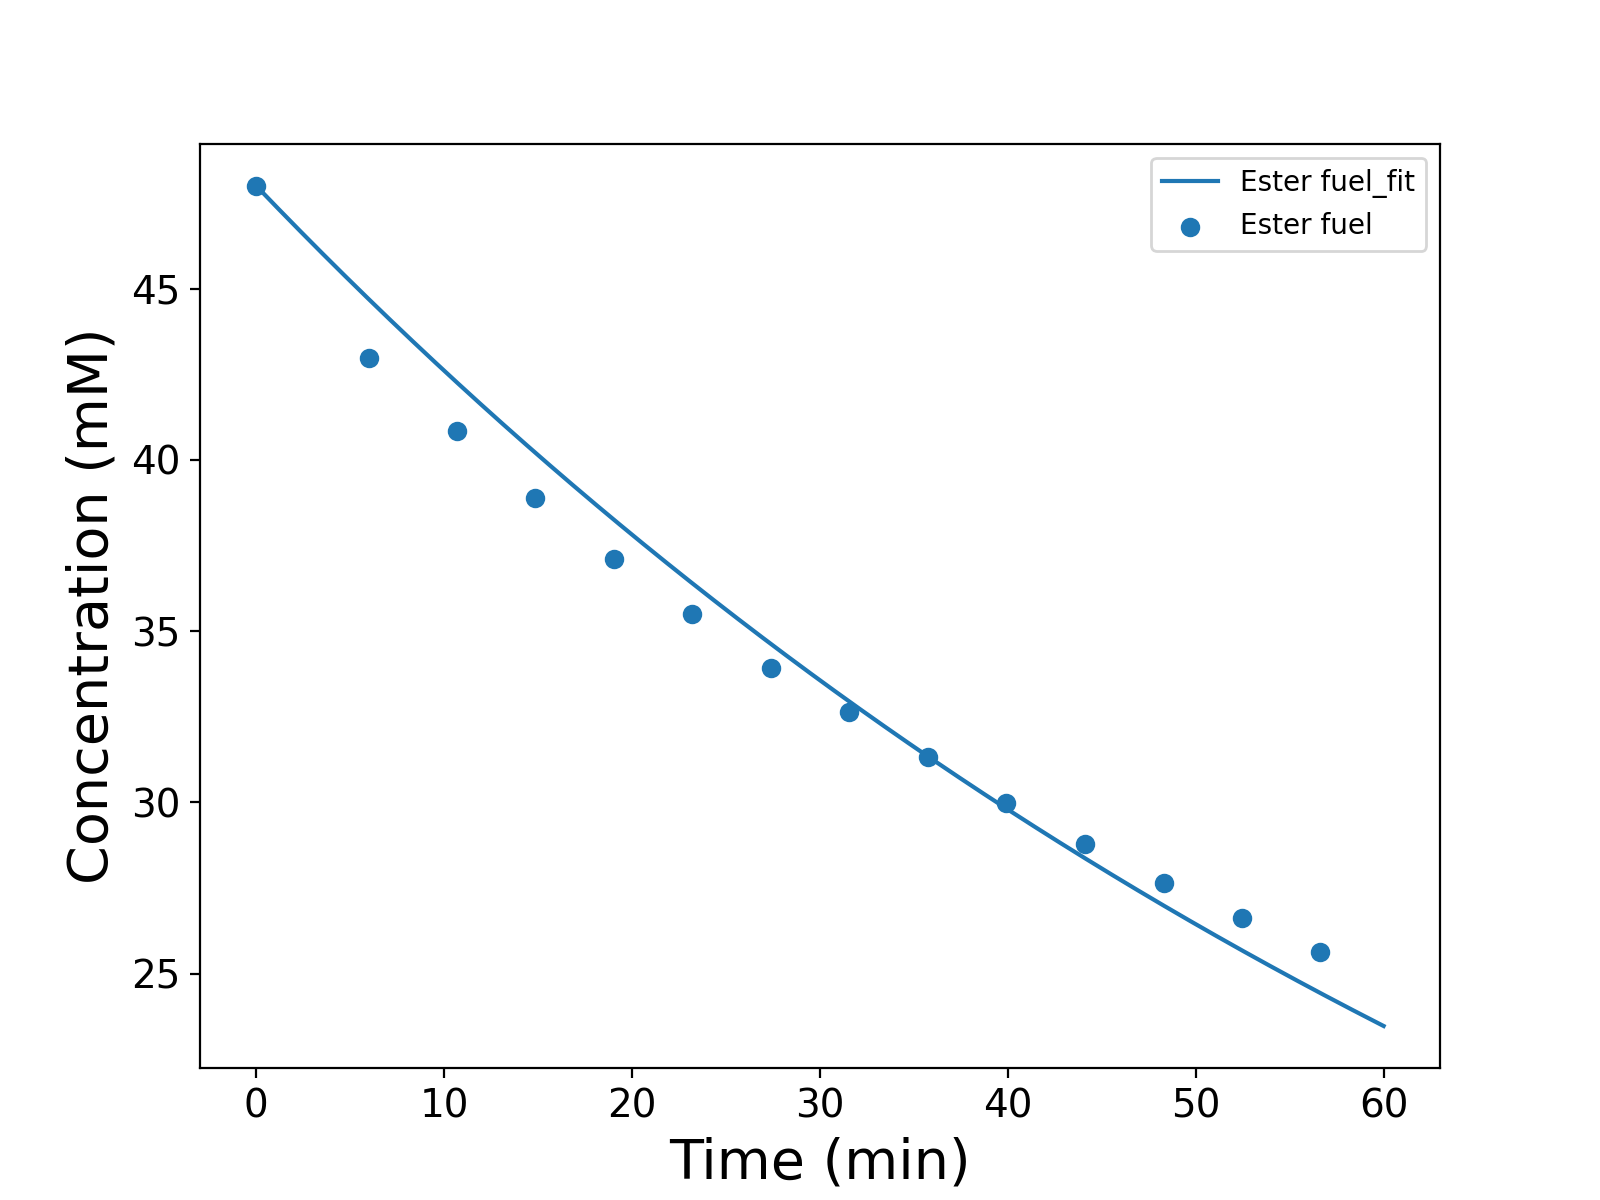

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-219-2 (pH 6.55) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [8]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-225-2 model fitting.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Aldehyde,Unnamed: 4,Imine ester,Intermediate 1,Intermediate 2,Unnamed: 8,Ester fuel,...,Unnamed: 11,Unnamed: 12,Phenol waste,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Fuel dimer,Alanine waste
0,-360,0.000000,4651.12,6.000000,0.000,0.000000,0,0,1.0,48.000000,...,0.000000,0.00,0.000000,1.0,0.000,0.000,0.000,0.0,0.000000,0.000000
1,0,6.000000,3135.13,4.759785,816.893,1.240215,0,0,46711.7,39.550978,...,0.629446,7440.02,6.411620,69445.5,2663.210,797.175,1119.870,11764.4,0.446023,6.582238
2,297,10.950000,1602.32,4.892807,362.589,1.107193,0,0,21281.8,35.993119,...,0.870345,5747.38,9.888811,33256.4,1271.370,718.303,866.581,10015.9,0.747445,10.422247
3,548,15.133333,1686.97,5.062867,312.257,0.937133,0,0,19540.0,33.283886,...,0.947217,7329.63,12.687842,30547.9,1017.020,822.778,998.538,12669.8,0.857506,13.204575
4,798,19.300000,1710.71,5.215222,257.425,0.784778,0,0,17973.5,30.835559,...,1.094390,8717.94,15.173934,28304.5,942.003,1023.120,1165.380,15172.0,1.053699,15.625463


In [9]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Aldehyde,Unnamed: 4,Imine ester,Intermediate 1,Intermediate 2,Unnamed: 8,Fuel,...,Unnamed: 11,Unnamed: 12,Waste,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Fuel dimer,Alanine waste
0,-360,0.000000,4651.12,6.000000,0.000,0.000000,0,0,1.0,48.000000,...,0.000000,0.00,0.000000,1.0,0.000,0.000,0.000,0.0,0.000000,0.000000
1,0,6.000000,3135.13,4.759785,816.893,1.240215,0,0,46711.7,39.550978,...,0.629446,7440.02,6.411620,69445.5,2663.210,797.175,1119.870,11764.4,0.446023,6.582238
2,297,10.950000,1602.32,4.892807,362.589,1.107193,0,0,21281.8,35.993119,...,0.870345,5747.38,9.888811,33256.4,1271.370,718.303,866.581,10015.9,0.747445,10.422247
3,548,15.133333,1686.97,5.062867,312.257,0.937133,0,0,19540.0,33.283886,...,0.947217,7329.63,12.687842,30547.9,1017.020,822.778,998.538,12669.8,0.857506,13.204575
4,798,19.300000,1710.71,5.215222,257.425,0.784778,0,0,17973.5,30.835559,...,1.094390,8717.94,15.173934,28304.5,942.003,1023.120,1165.380,15172.0,1.053699,15.625463


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        2.028681e-02 5.849619e-04
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   10
Objective              <symfit.core.objectives.LeastSquares object at 0x7f9804a5e070>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7f9804a62ca0>

Goodness of fit qualifiers:
chi_squared            31.363484372789973
objective_value        15.681742186394986
r_squared              0.9705012762827354


<IPython.core.display.Javascript object>


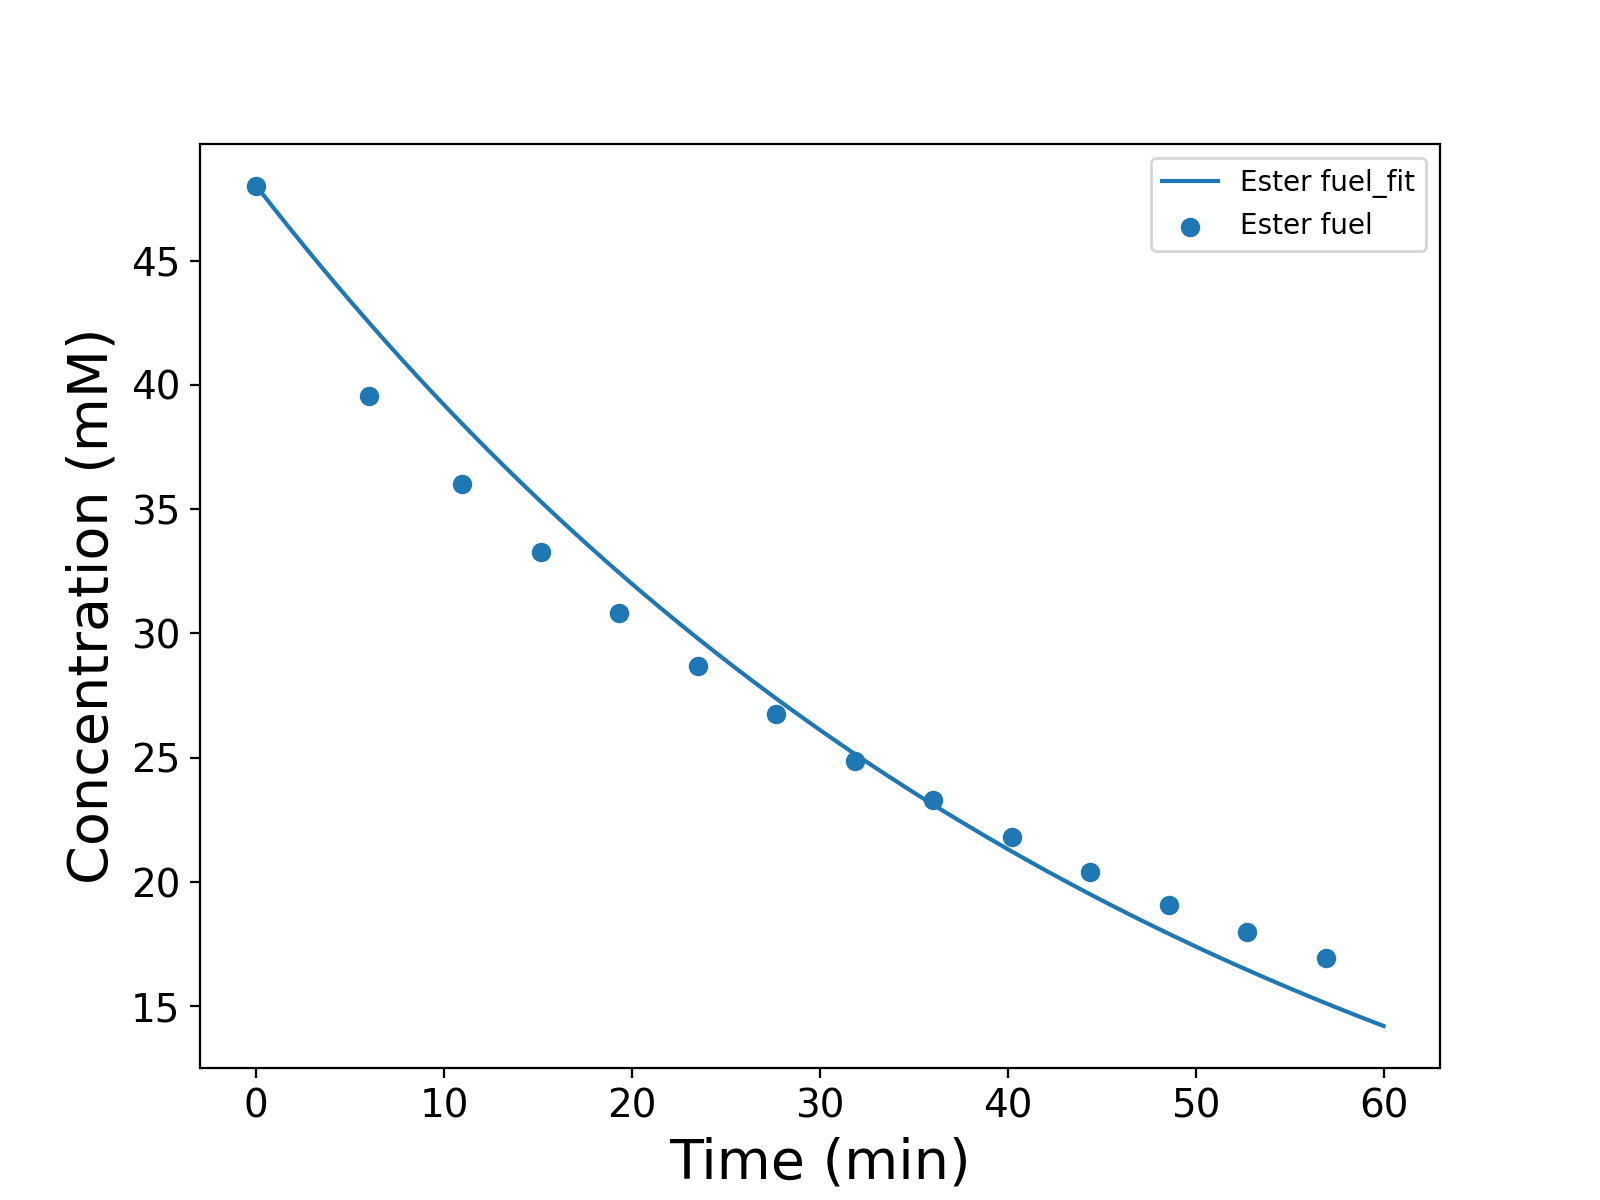

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-225-2 (pH 7.00) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [4]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-219-4.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Aldehyde,Unnamed: 4,Imine ester,Unnamed: 6,Other imines,Unnamed: 8,Byproducts,...,Imine ester aggregate that precipitated,Unnamed: 12,Ester fuel,Unnamed: 14,Fuel dimer,Unnamed: 16,Phenol waste,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,-420,0.000000,3521.080,5.999999,0.000,0.000000,0.0000,0.000000,0.00000,0.000000,...,6.286249e-07,1.00,47.964611,0.00,0.000000,0.0,0.000000,21486.9,6.102361,21486.900000
1,0,7.000000,546.611,0.977561,753.526,1.347608,223.7400,0.400137,-18.80680,-0.033634,...,3.308327e+00,23262.70,23.247622,5022.05,4.408560,14490.8,14.966193,20473.1,13.602754,0.478617
2,279,11.650000,192.133,0.620998,186.968,0.604304,97.6245,0.315535,-26.40930,-0.085358,...,4.544522e+00,9373.97,17.557524,2692.71,4.788790,10237.3,19.564777,11328.2,25.156101,0.507900
3,530,15.833333,174.377,0.562159,142.384,0.459020,100.4230,0.323745,-23.18230,-0.074735,...,4.729811e+00,7411.53,14.040247,2616.62,4.778950,11888.9,22.963233,11357.4,28.825764,0.518199
4,781,20.016667,191.498,0.615447,141.061,0.453350,107.7590,0.346322,-4.21933,-0.013560,...,4.598442e+00,5960.24,11.348933,2587.08,4.770382,13203.1,25.749526,11392.6,26.123904,0.523788


In [5]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Aldehyde,Unnamed: 4,Imine ester,Unnamed: 6,Other imines,Unnamed: 8,Byproducts,...,Imine ester aggregate that precipitated,Unnamed: 12,Fuel,Unnamed: 14,Fuel dimer,Unnamed: 16,Waste,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,-420,0.000000,3521.080,5.999999,0.000,0.000000,0.0000,0.000000,0.00000,0.000000,...,6.286249e-07,1.00,47.964611,0.00,0.000000,0.0,0.000000,21486.9,6.102361,21486.900000
1,0,7.000000,546.611,0.977561,753.526,1.347608,223.7400,0.400137,-18.80680,-0.033634,...,3.308327e+00,23262.70,23.247622,5022.05,4.408560,14490.8,14.966193,20473.1,13.602754,0.478617
2,279,11.650000,192.133,0.620998,186.968,0.604304,97.6245,0.315535,-26.40930,-0.085358,...,4.544522e+00,9373.97,17.557524,2692.71,4.788790,10237.3,19.564777,11328.2,25.156101,0.507900
3,530,15.833333,174.377,0.562159,142.384,0.459020,100.4230,0.323745,-23.18230,-0.074735,...,4.729811e+00,7411.53,14.040247,2616.62,4.778950,11888.9,22.963233,11357.4,28.825764,0.518199
4,781,20.016667,191.498,0.615447,141.061,0.453350,107.7590,0.346322,-4.21933,-0.013560,...,4.598442e+00,5960.24,11.348933,2587.08,4.770382,13203.1,25.749526,11392.6,26.123904,0.523788


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        7.249232e-02 4.646284e-03
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   5
Objective              <symfit.core.objectives.LeastSquares object at 0x7fa0a07595b0>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fa0a0759580>

Goodness of fit qualifiers:
chi_squared            95.76762184961348
objective_value        47.88381092480674
r_squared              0.9482151278134284


<IPython.core.display.Javascript object>


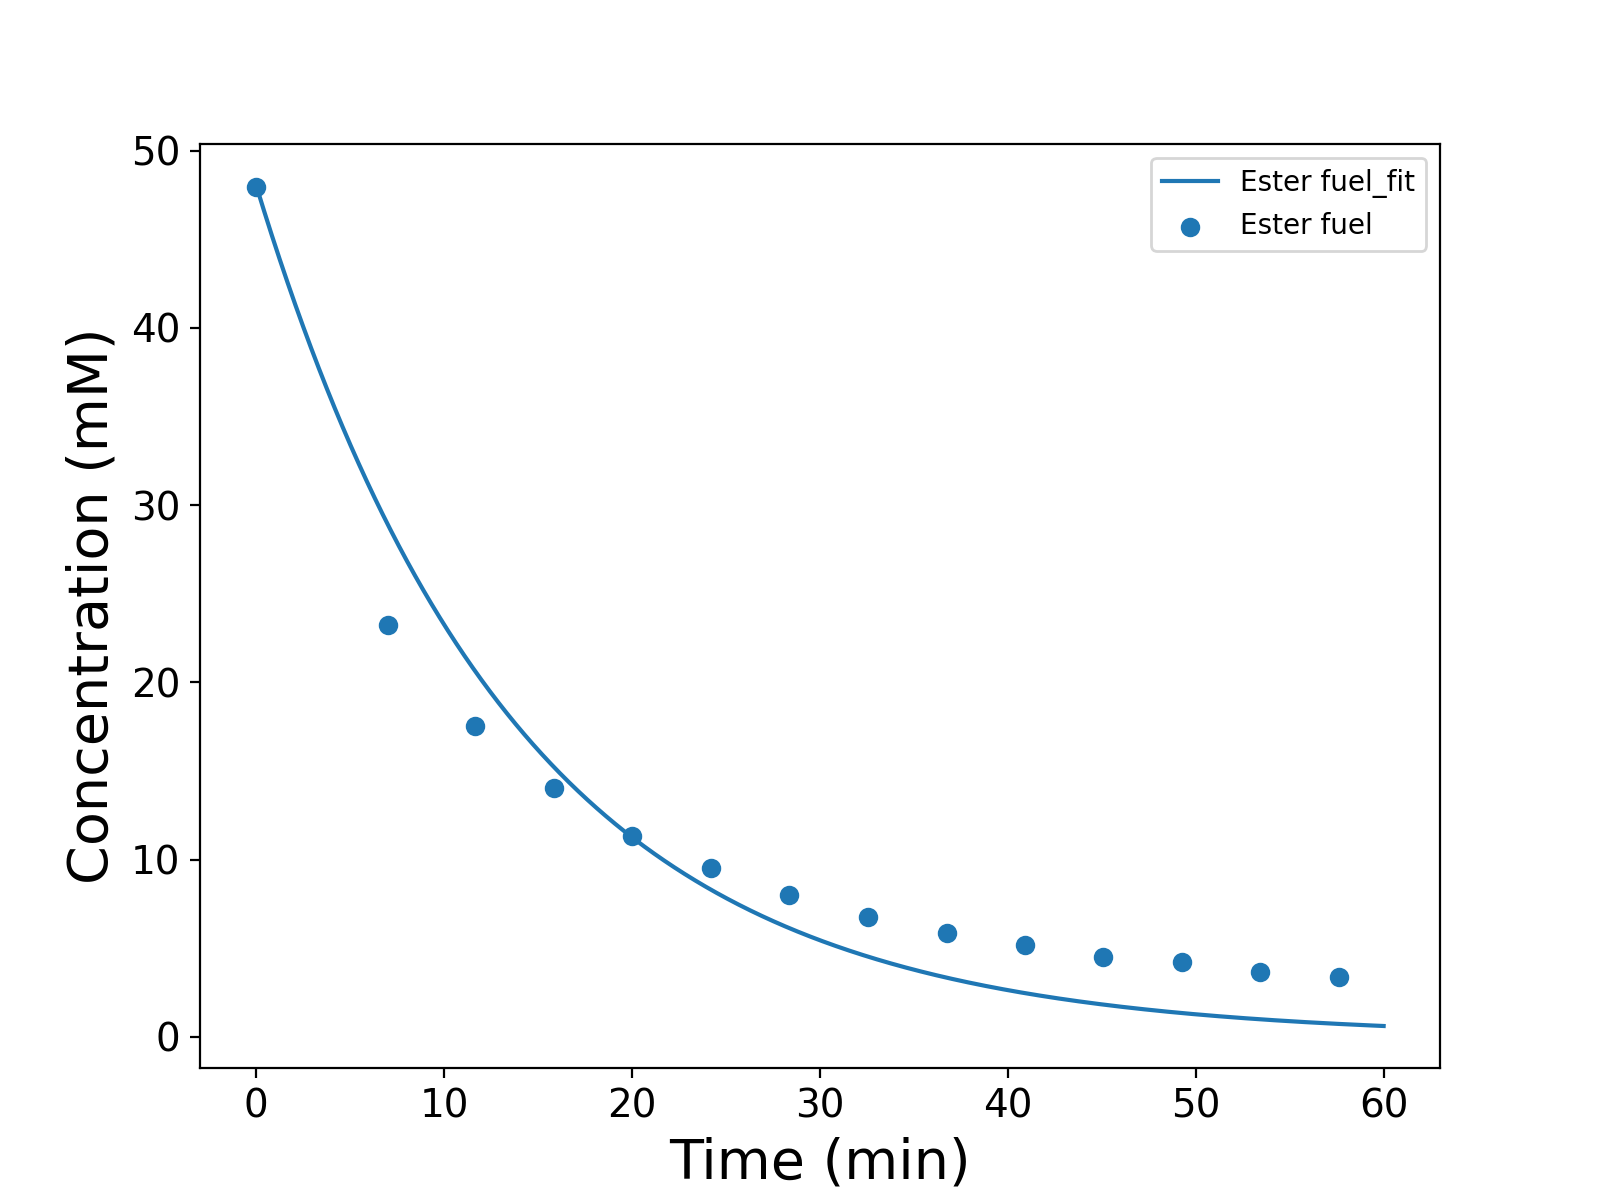

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-219-4 (pH 7.90) based on concentration. The concentration was calculated WITH an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()